In [32]:
#coding:utf-8
import os
import cv2
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import shutil

In [12]:
data_path = './train/'
test_path = './test/'
val_path = './val/'
gt_files = os.listdir(data_path)
classes = gt_files
print (classes)
imgs = []
labels = []
for i in range(len(gt_files)):
    img_folder = data_path + str(gt_files[i])
    img_path = os.listdir(img_folder)
    for img in img_path:
        labels.append(i)
        cv2_img = cv2.imread(img_folder + '/' + img)
#         cv2.imshow(img, cv2_img)
        w,h,c = cv2_img.shape
        pixels = np.reshape(cv2_img,[1, w*h*c])
        imgs.append(pixels)
        


['中国结', '仪表盘', '公交卡', '冰箱', '创可贴', '刺绣', '剪纸', '印章', '卷尺', '双面胶', '口哨', '啤酒', '安全帽', '开瓶器', '手掌印', '打字机', '护腕', '拖把', '挂钟', '排风机', '文具盒', '日历', '本子', '档案袋', '棉棒', '樱桃', '毛线', '沙包', '沙拉', '海报', '海苔', '海鸥', '漏斗', '烛台', '热水袋', '牌坊', '狮子', '珊瑚', '电子秤', '电线', '电饭煲', '盘子', '篮球', '红枣', '红豆', '红酒', '绿豆', '网球拍', '老虎', '耳塞', '航母', '苍蝇拍', '茶几', '茶盅', '药', '菠萝', '蒸笼', '薯条', '蚂蚁', '蜜蜂', '蜡烛', '蜥蜴', '订书机', '话梅', '调色板', '跑步机', '路灯', '辣椒酱', '金字塔', '钟表', '铃铛', '锅铲', '锣', '锦旗', '雨靴', '鞭炮', '风铃', '高压锅', '黑板', '龙舟']


In [9]:
seed = 20
random.Random(seed).shuffle(imgs)
random.Random(seed).shuffle(labels)

train_num = 10000

train_x = imgs[:train_num]
train_y = labels[:train_num]

test_x = imgs[train_num:]
test_y = labels[train_num:]



In [10]:
np.save('train_x', train_x)
np.save('train_y', train_y)
np.save('test_x', test_x)
np.save('test_y', test_y)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


毛线
蜡烛
钟表
珊瑚
本子
话梅
档案袋
档案袋
盘子
电线
冰箱
高压锅
热水袋
漏斗
路灯
安全帽


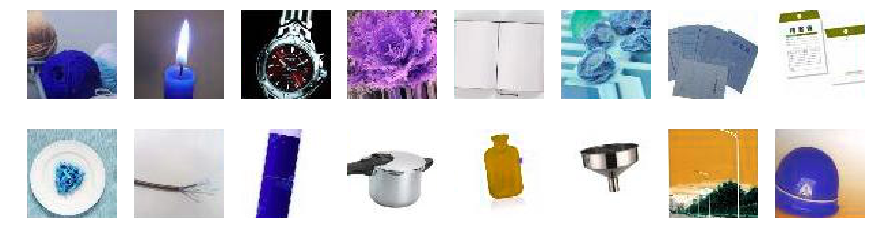

In [11]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_y))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        img = np.reshape(train_x[random_index], [66,66,3])
        ax.imshow(img)
        print (classes[train_y[random_index]])
plt.show()


In [35]:
for label in classes:
    os.mkdir(test_path + label)
    os.mkdir(val_path + label)

In [36]:
def copyFiles(sourceDir,  targetDir):
    class_folder = os.listdir(sourceDir)
    for labels in class_folder:
        imgs = os.listdir(sourceDir + labels)
        img_num = len(imgs)
        chosen_imgs = random.sample(imgs, 20)
        for img in chosen_imgs:
            shutil.move(sourceDir + labels + '/' + img, targetDir + labels + '/' + img)

In [38]:
copyFiles('./train/','./test/')
copyFiles('./train/','./val/')